In [29]:
from utils_fact_checking_benchmark import FactCheckingBenchmark
from model_summac import SummaCHisto, SummaCZS
import utils_fact_checking_benchmark

benchmark = FactCheckingBenchmark(cut="val")
benchmark.print_stats()
model = SummaCZS(granularity="sentence", model_name="vitc", imager_load_cache=True)

2021-07-22 23:25:16,014 [32557] WARNING  datasets.builder:510: [JupyterRequire] Reusing dataset cnn_dailymail (/home/phillab/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
2021-07-22 23:25:16,786 [32557] WARNING  datasets.builder:355: [JupyterRequire] Using custom data configuration default
2021-07-22 23:25:16,789 [32557] WARNING  datasets.builder:510: [JupyterRequire] Reusing dataset xsum (/home/phillab/.cache/huggingface/datasets/xsum/default/1.2.0/4957825a982999fbf80bca0b342793b01b2611e021ef589fb7c6250b3577b499)


        name     N  N_pos  N_neg  frac_pos
0     factcc   931    799    132  0.858217
1      frank   671    223    448  0.332340
2   polytope   634     42    592  0.066246
3  cogensumm  1281    637    644  0.497268
4   summeval   850    770     80  0.905882
5  xsumfaith  1250    127   1123  0.101600


In [2]:
flat_data = []
for task in benchmark.tasks:
    flat_data += task["task"]
    

In [4]:
summac_out = model.score([d["document"] for d in flat_data], [d["claim"] for d in flat_data])

scores = summac_out["scores"]
images = summac_out["images"]

In [9]:
import numpy as np

vals = {}

maxX, maxY = 0, 0
for image in images:
    X, Y, _ = image.shape
    maxX, maxY = max(X, maxX), max(Y, maxY)
    for x in range(X):
        for y in range(Y):
            k = (x,y)
            if k not in vals:
                vals[k] = []
            vals[k].append(image[x,y,0])
            

In [14]:
maxY = 50
large_image = np.zeros((maxX, maxY))

for x in range(maxX):
    for y in range(maxY):
        large_image[x, y] = np.mean(vals[(x,y)])

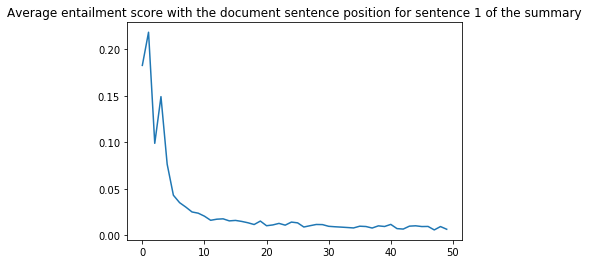

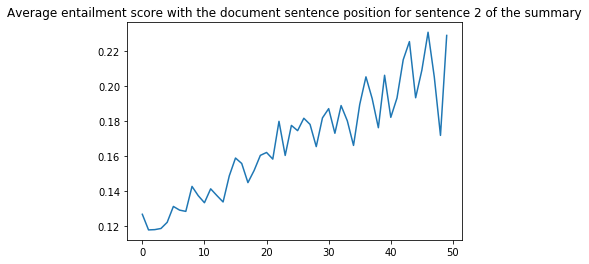

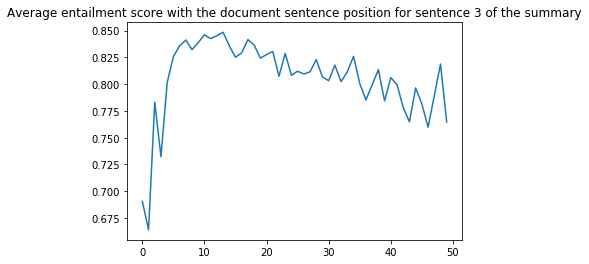

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

for x in range(3):
    plt.figure()
    plt.title("Average entailment score with the document sentence position for sentence %d of the summary" % (x+1))
    plt.plot(large_image[x])
    plt.show()